In [26]:
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit as draw

Teleportation

In quantum teleportation, Alice and Bob get their control qubits to share a Bell state 
through quantum entanglement. Alice wants to send Bob a qubit state, |ψ⟩ . We refer to 
this qubit for transmission as Q1 and the control qubits Alice and Bob use to share a Bell 
state as Q2 and Q3.

In [108]:
q=cirq.LineQubit.range(3)
c=cirq.Circuit()


In [109]:
c.append(cirq.H(q[1]))
c.append(cirq.CNOT(q[1],q[2]))

In [110]:
s = cirq.Simulator()
result = s.simulate(c, qubit_order=[q[0], q[1],q[2]])
result.dirac_notation()

In [111]:
result = s.simulate(c, qubit_order=[q[0], q[1],q[2]])
result.dirac_notation()

'0.71|000⟩ + 0.71|011⟩'

In [113]:
c.append(cirq.measure([i for i in q],key='measure_all'))

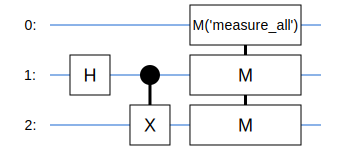

In [114]:
draw(c)

In [162]:
def bitstring(bits):
    return ''.join(str(int(b)) for b in bits)
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]

In [136]:
sample=s.run(c,repetitions=10000)
result=sample.histogram(key='measure_all',fold_func=bitstring)

In [137]:
result

Counter({'011': 4947, '000': 5053})

d:\Conda\envs\Cna\lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

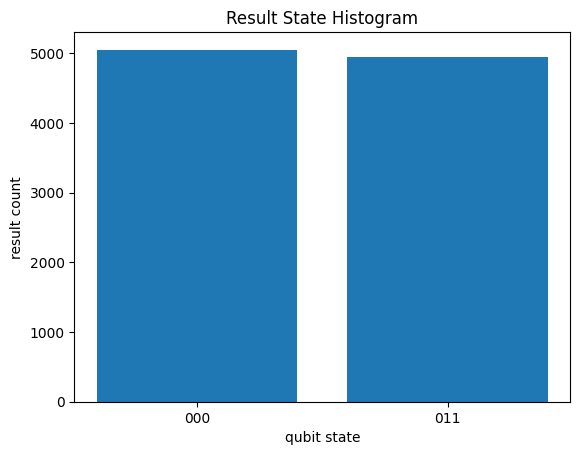

In [140]:
cirq.plot_state_histogram(result)

d:\Conda\envs\Cna\lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

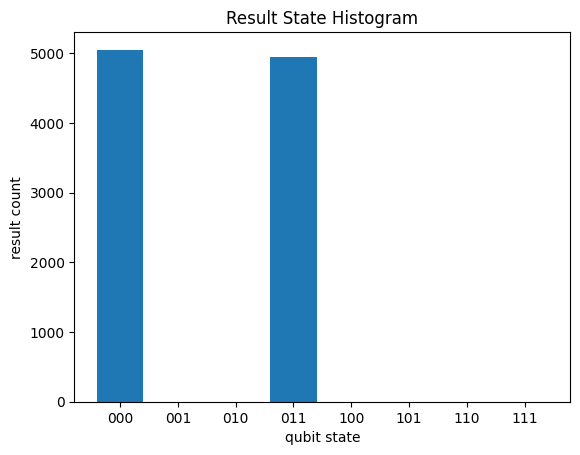

In [163]:
cirq.plot_state_histogram(sample,tick_label=binary_labels(3))

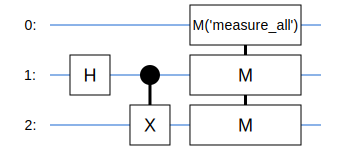

In [164]:
draw(c)